In [ ]:
#Run the following code to print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

# Polishing Visualizations

Last class, we looked at the basics for creating graphs with `gglot()`. In general, the layers of a basic `ggplot()` graph are as follows:

```
(ggplot(df, aes(map variables to the graphical elements)) +
   geometric_function())
```

Today, we're going to look at code to add titles/labels, to customize the graphical elements, and to annotate text, points, or lines. We simply add these layers as follows:

```
(ggplot(df, aes(map variables to the graphical elements)) +
   geometric_function() +
   labs(customize titles/labels) +
   scale...(customize the graphical elements) +
   annotate(add annotations to the graph))
```

Let's again import `plotnine` as well as the file, "dataBeatport.csv": 

In [ ]:
from plotnine import *
import pandas as pd
df = pd.read_csv("dataBeatport.csv")
df

## Review of `ggplot()` structure

To review what we covered last class, write code to create a scatter plot with the following elements:

* "labelSongs" is x and "daysAfterRelease" is y
* color the points by the "enteredCharts" variable (remember to use `factor()` to tell `ggplot()` to treat "enteredCharts" as a categorical variable)
* add "genre" as a shape element
* add "twitterFollowers" as a size element

Let's start to customize this graph to make it easier to interpret.

## Titles/Labels

Use the `+ labs()` layer to customize your chart title and labels. Below, I've provided the `labs()` layer for the graph above...copy/paste that code to the cell below to include these labels:

In [ ]:
(  +
   labs(title = "this is a title",
       subtitle = "this is a subtitle",
       caption = "this is a caption",
       x = "this is the x-axis label",
       y = "this is the y-axis label",
       color = "this is the color legend",
       shape = "this is the shape legend",
       size = "this is the size legend")
)

Copy/paste the code to the cell below and update the titles/labels with the following information:

* Title: "No relationship between Label Songs and Release Days"
* Subtitle: "Entered vs. Not Entered the Charts"
* Caption: "Source: dataBeatport.csv"
* x-axis: "# of Songs from the Label"
* y-axis: "Days after Release"
* color legend: "Entered the Charts?"
* shape legend: "Music Genre"
* size legend: "# of Twitter Followers"

We don't really need the shape legend for Music Genre since the categories make it obvious. Can you figure out how to adjust your code to remove that title?

Also, I think the title might look better on 2 lines...to add a line break, you can use "\n" in your title. Add that before the word "and" and re-run your code.

## Scales

Now that we've labeled our graph, we can use scales to adjust the graphical elements for each variable. The structure of the scales layer is as follows:

```
   + scale_aestheticElement_discreteOrContinuous(settings)
```

For example: `scale_x_continuous(settings)` or `scale_color_discrete(settings)`, etc.

### X and Y scales

Let's first look at the x- and y-axes. Both variables are continuous variables, so we'll use `scale_x_continuous()` and `scale_y_continuous()`.

Let's change the tick marks for the x axis with the `breaks` setting:

In [ ]:
(ggplot(df, aes(x = "labelSongs", y = "daysAfterRelease", color = "factor(enteredCharts)",
               shape = "genre", size = "twitterFollowers")) +
   geom_point()   +
   labs(title = "No relationship between Label Songs \nand Release Days",
       subtitle = "Entered vs. Not Entered the Charts",
       caption = "Source: dataBeatport.csv",
       x = "# of Songs from the Label",
       y = "Days after Release",
       color = "Entered the Charts?",
       shape = "",
       size = "# of Twitter Followers") +
   scale_x_continuous(breaks = [0, 2500, 5000, 7500, 10000, 12500, 15000])
)

We can also change the tick mark labels using the `label` setting. Let's abbreviate the tick mark labels using "k" to indicate thousands:

In [ ]:
(ggplot(df, aes(x = "labelSongs", y = "daysAfterRelease", color = "factor(enteredCharts)",
               shape = "genre", size = "twitterFollowers")) +
   geom_point()   +
   labs(title = "No relationship between Label Songs \nand Release Days",
       subtitle = "Entered vs. Not Entered the Charts",
       caption = "Source: dataBeatport.csv",
       x = "# of Songs from the Label",
       y = "Days after Release",
       color = "Entered the Charts?",
       shape = "",
       size = "# of Twitter Followers") +
   scale_x_continuous(breaks = [0, 2500, 5000, 7500, 10000, 12500, 15000],
                     labels = ["0k", "2.5k", "5k", "7.5k", "10k", "12.5k", "15k"])
)

What if you wanted to filter the "artistSongs" variable to only display a subset of data? You can use the `limits` setting:

In [ ]:
(ggplot(df, aes(x = "labelSongs", y = "daysAfterRelease", color = "factor(enteredCharts)",
               shape = "genre", size = "twitterFollowers")) +
   geom_point()   +
   labs(title = "No relationship between Label Songs \nand Release Days",
       subtitle = "Entered vs. Not Entered the Charts",
       caption = "Source: dataBeatport.csv",
       x = "# of Songs from the Label",
       y = "Days after Release",
       color = "Entered the Charts?",
       shape = "",
       size = "# of Twitter Followers") +
   scale_x_continuous(breaks = [0, 2500, 5000, 7500, 10000, 12500, 15000],
                     labels = ["0k", "2.5k", "5k", "7.5k", "10k", "12.5k", "15k"],
                     limits = [0,10000])
)

To recap, we used `breaks`, `labels`, and `limits` to customize the x-axis. Now you try...customize the y-axis as follows:

* Display data for days 0 to 50 only
* Show tick marks for 0, 10, 20, 30, 40, and 50 days

### Color/Shape/Size Scales

We can also use `breaks`, `labels`, and `limits` for color, shape, and size aesthetic elements. The `breaks` set the values that are listed in each legend. For example, let's only show 5,000,000 and 20,000,000 in the size legend:

In [ ]:
(ggplot(df, aes(x = "labelSongs", y = "daysAfterRelease", color = "factor(enteredCharts)",
               shape = "genre", size = "twitterFollowers")) +
   geom_point()   +
   labs(title = "No relationship between Label Songs \nand Release Days",
       subtitle = "Entered vs. Not Entered the Charts",
       caption = "Source: dataBeatport.csv",
       x = "# of Songs from the Label",
       y = "Days after Release",
       color = "Entered the Charts?",
       shape = "",
       size = "# of Twitter Followers") +
   scale_x_continuous(breaks = [0, 2500, 5000, 7500, 10000, 12500, 15000],
                     labels = ["0k", "2.5k", "5k", "7.5k", "10k", "12.5k", "15k"],
                     limits = [0,10000]) +
   scale_y_continuous(breaks = [0, 10, 20, 30, 40, 50],
                     limits = [0,50]) +
   scale_size_continuous(breaks = [5000000, 20000000],
                        labels = ["5M", "20M"])
)

Now you try. For the color legend, let's re-label "0" as "Didn't enter charts" and "1" as "Entered charts". Also, since we're labeling the colors, let's remove the legend label.

### Updating the Size range

An additional setting for the `size` scale is `range`, where you can set the range of the sizes:

In [ ]:
(ggplot(df, aes(x = "labelSongs", y = "daysAfterRelease", color = "factor(enteredCharts)",
               shape = "genre", size = "twitterFollowers")) +
   geom_point()   +
   labs(title = "No relationship between Label Songs \nand Release Days",
       subtitle = "Entered vs. Not Entered the Charts",
       caption = "Source: dataBeatport.csv",
       x = "# of Songs from the Label",
       y = "Days after Release",
       color = "",
       shape = "",
       size = "# of Twitter Followers") +
   scale_x_continuous(breaks = [0, 2500, 5000, 7500, 10000, 12500, 15000],
                     labels = ["0k", "2.5k", "5k", "7.5k", "10k", "12.5k", "15k"],
                     limits = [0,10000]) +
   scale_y_continuous(breaks = [0, 10, 20, 30, 40, 50],
                     limits = [0,50]) +
   scale_size_continuous(breaks = [5000000, 20000000],
                        labels = ["5M", "20M"],
                        range = [1,8]) +
   scale_color_discrete(labels = ["Didn't enter charts", "Entered charts"])
)

### Updating the Colors

For the `color` scale, you can specify the colors you'd like to use with the `values` setting. However, you also need to specifically use `scale_color_manual` when doing this:

In [ ]:
(ggplot(df, aes(x = "labelSongs", y = "daysAfterRelease", color = "factor(enteredCharts)",
               shape = "genre", size = "twitterFollowers")) +
   geom_point()   +
   labs(title = "No relationship between Label Songs \nand Release Days",
       subtitle = "Entered vs. Not Entered the Charts",
       caption = "Source: dataBeatport.csv",
       x = "# of Songs from the Label",
       y = "Days after Release",
       color = "",
       shape = "",
       size = "# of Twitter Followers") +
   scale_x_continuous(breaks = [0, 2500, 5000, 7500, 10000, 12500, 15000],
                     labels = ["0k", "2.5k", "5k", "7.5k", "10k", "12.5k", "15k"],
                     limits = [0,10000]) +
   scale_y_continuous(breaks = [0, 10, 20, 30, 40, 50],
                     limits = [0,50]) +
   scale_size_continuous(breaks = [5000000, 20000000],
                        labels = ["5M", "20M"],
                        range = [1,8]) +
   scale_color_manual(labels = ["Didn't enter charts", "Entered charts"],
                       values = ["tan", "maroon"])
)

You can find codes for other colors here:  https://en.wikipedia.org/wiki/Web_colors.

### Changing the Shapes

With the `shape` scale, you can specify specific shapes, again with the `values` setting. Let's say we wanted all genres with "House" in the name to be represented with circles ("o") and everything else with pluses ("+"):

In [ ]:
(ggplot(df, aes(x = "labelSongs", y = "daysAfterRelease", color = "factor(enteredCharts)",
               shape = "genre", size = "twitterFollowers")) +
   geom_point()   +
   labs(title = "No relationship between Label Songs \nand Release Days",
       subtitle = "Entered vs. Not Entered the Charts",
       caption = "Source: dataBeatport.csv",
       x = "# of Songs from the Label",
       y = "Days after Release",
       color = "",
       shape = "",
       size = "# of Twitter Followers") +
   scale_x_continuous(breaks = [0, 2500, 5000, 7500, 10000, 12500, 15000],
                     labels = ["0k", "2.5k", "5k", "7.5k", "10k", "12.5k", "15k"],
                     limits = [0,10000]) +
   scale_y_continuous(breaks = [0, 10, 20, 30, 40, 50],
                     limits = [0,50]) +
   scale_size_continuous(breaks = [5000000, 20000000],
                        labels = ["5M", "20M"],
                        range = [1,8]) +
   scale_color_manual(labels = ["Didn't enter charts", "Entered charts"],
                       values = ["tan", "maroon"]) +
   scale_shape_manual(values = {"Deep House": "o", "Dubstep": "+", "Electro House": "o",
                               "House": "o", "Progressive House": "o", "Techno": "+",
                               "Trance": "+"})
)

You can find a list of codes for shapes at this link: https://matplotlib.org/stable/api/markers_api.html.

## Annotations

Using `scale` layers allow you to customize the appearance of any graphical elements that are mapped to a variable. What if you want to add an element that is not tied to a variable? You can do this with annotations.

The structure of the `annotate` layer is as follows:

```
  + annotate("annotationObject", x = x_coordinate, y = y_coordinate)
```

...where the x- and y-coordinates are where you want to center your annotation. You can also add on other settings like `color` and `size`.

The three annotation objects we'll cover are "text", "point", and "segment".

### Annotate: Text

You can use `"text"` to annotate text onto your graph. Let's label the point in the lower right corner of the graph as an outlier:

In [ ]:
(ggplot(df, aes(x = "labelSongs", y = "daysAfterRelease", color = "factor(enteredCharts)",
               shape = "genre", size = "twitterFollowers")) +
   geom_point()   +
   labs(title = "No relationship between Label Songs \nand Release Days",
       subtitle = "Entered vs. Not Entered the Charts",
       caption = "Source: dataBeatport.csv",
       x = "# of Songs from the Label",
       y = "Days after Release",
       color = "",
       shape = "",
       size = "# of Twitter Followers") +
   scale_x_continuous(breaks = [0, 2500, 5000, 7500, 10000, 12500, 15000],
                     labels = ["0k", "2.5k", "5k", "7.5k", "10k", "12.5k", "15k"],
                     limits = [0,10000]) +
   scale_y_continuous(breaks = [0, 10, 20, 30, 40, 50],
                     limits = [0,50]) +
   scale_size_continuous(breaks = [5000000, 20000000],
                        labels = ["5M", "20M"],
                        range = [1,8]) +
   scale_color_manual(labels = ["Didn't enter charts", "Entered charts"],
                       values = ["tan", "maroon"]) +
   scale_shape_manual(values = {"Deep House": "o", "Dubstep": "+", "Electro House": "o",
                               "House": "o", "Progressive House": "o", "Techno": "+",
                               "Trance": "+"}) +
   annotate("text", label = "Outlier", x = 9000, y = 10, color = "green", size = 15)
)

### Annotate: Point

We can annotate a `"point"` onto the graph, once again setting the coordinates for where it should be drawn. Let's label that outlier point with a large green dot:

In [ ]:
(ggplot(df, aes(x = "labelSongs", y = "daysAfterRelease", color = "factor(enteredCharts)",
               shape = "genre", size = "twitterFollowers")) +
   geom_point()   +
   labs(title = "No relationship between Label Songs \nand Release Days",
       subtitle = "Entered vs. Not Entered the Charts",
       caption = "Source: dataBeatport.csv",
       x = "# of Songs from the Label",
       y = "Days after Release",
       color = "",
       shape = "",
       size = "# of Twitter Followers") +
   scale_x_continuous(breaks = [0, 2500, 5000, 7500, 10000, 12500, 15000],
                     labels = ["0k", "2.5k", "5k", "7.5k", "10k", "12.5k", "15k"],
                     limits = [0,10000]) +
   scale_y_continuous(breaks = [0, 10, 20, 30, 40, 50],
                     limits = [0,50]) +
   scale_size_continuous(breaks = [5000000, 20000000],
                        labels = ["5M", "20M"],
                        range = [1,8]) +
   scale_color_manual(labels = ["Didn't enter charts", "Entered charts"],
                       values = ["tan", "maroon"]) +
   scale_shape_manual(values = {"Deep House": "o", "Dubstep": "+", "Electro House": "o",
                               "House": "o", "Progressive House": "o", "Techno": "+",
                               "Trance": "+"}) +
   annotate("text", label = "Outlier", x = 9000, y = 10, color = "green", size = 15) +
   annotate("point", x = 9100, y = 6, color = "green", size = 5, shape = "X")
)

### Annotate: Segment

To draw a line, you can annotate a `"segment"`. Because there's a starting and ending point for both the x- and y-coordinates, you need to specify each. Let's draw a dashed horizontal line for the mean value of "daysAfterRelease" (which is 15.4):

In [ ]:
(ggplot(df, aes(x = "labelSongs", y = "daysAfterRelease", color = "factor(enteredCharts)",
               shape = "genre", size = "twitterFollowers")) +
   geom_point()   +
   labs(title = "No relationship between Label Songs \nand Release Days",
       subtitle = "Entered vs. Not Entered the Charts",
       caption = "Source: dataBeatport.csv",
       x = "# of Songs from the Label",
       y = "Days after Release",
       color = "",
       shape = "",
       size = "# of Twitter Followers") +
   scale_x_continuous(breaks = [0, 2500, 5000, 7500, 10000, 12500, 15000],
                     labels = ["0k", "2.5k", "5k", "7.5k", "10k", "12.5k", "15k"],
                     limits = [0,10000]) +
   scale_y_continuous(breaks = [0, 10, 20, 30, 40, 50],
                     limits = [0,50]) +
   scale_size_continuous(breaks = [5000000, 20000000],
                        labels = ["5M", "20M"],
                        range = [1,8]) +
   scale_color_manual(labels = ["Didn't enter charts", "Entered charts"],
                       values = ["tan", "maroon"]) +
   scale_shape_manual(values = {"Deep House": "o", "Dubstep": "+", "Electro House": "o",
                               "House": "o", "Progressive House": "o", "Techno": "+",
                               "Trance": "+"}) +
   annotate("text", label = "Outlier", x = 9000, y = 10, color = "green", size = 15) +
   annotate("point", x = 9100, y = 6, color = "green", size = 5, shape = "X") +
   annotate("segment", x = 0, xend = 10000, y = 15.4, yend = 15.4, linetype = "dashed", 
           color = "blue", size = 1)
)

We probably should label the line. Annotate text onto the graph (above the blue line) to indicate "Average Days" and use blue font color:

## Practice

Re-create the following bar chart:

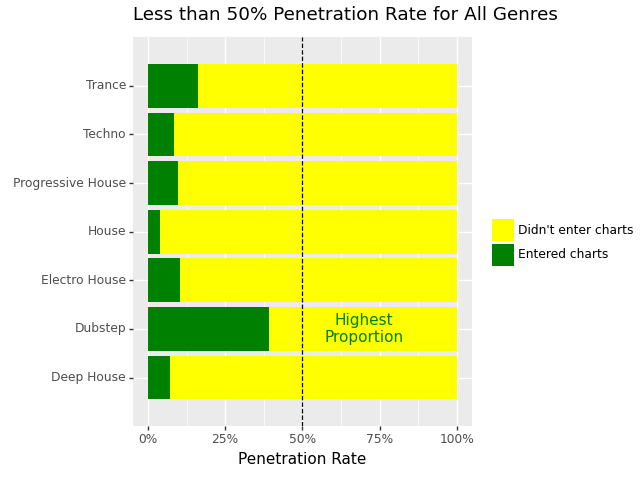

The following are hints that might help you:

* The variables I used are "genre" and "enteredCharts"
* Remember to use `factor()` to convert "enteredCharts" to categorical
* Similar to `scale_color_manual()`, there's also a `scale_fill_manual()` and the colors I used are "yellow" and "green"
* For the dashed line, x = 0 and xend = 8

## Going Further...Themes

There's even more that you can do to customize the appearance of your graph. Adding `theme` layers allows you to adjust the overall appearance. For example, here's a revised version of the graph we've been working with:

In [ ]:
(ggplot(df, aes(x = "labelSongs", y = "daysAfterRelease", color = "factor(enteredCharts)",
               shape = "genre", size = "twitterFollowers")) +
   geom_point()   +
   labs(title = "No relationship between Label Songs \nand Release Days",
       subtitle = "Entered vs. Not Entered the Charts",
       caption = "Source: dataBeatport.csv",
       x = "# of Songs from the Label",
       y = "Days after Release",
       color = "",
       shape = "",
       size = "# of Twitter Followers") +
   scale_x_continuous(breaks = [0, 2500, 5000, 7500, 10000, 12500, 15000],
                     labels = ["0k", "2.5k", "5k", "7.5k", "10k", "12.5k", "15k"],
                     limits = [0,10000]) +
   scale_y_continuous(breaks = [0, 10, 20, 30, 40, 50],
                     limits = [0,50]) +
   scale_size_continuous(breaks = [5000000, 20000000],
                        labels = ["5M", "20M"],
                        range = [1,8]) +
   scale_color_manual(labels = ["Didn't enter charts", "Entered charts"],
                       values = ["tan", "maroon"]) +
   scale_shape_manual(values = {"Deep House": "o", "Dubstep": "+", "Electro House": "o",
                               "House": "o", "Progressive House": "o", "Techno": "+",
                               "Trance": "+"}) +
   annotate("text", label = "Outlier", x = 9000, y = 10, color = "green", size = 15) +
   annotate("point", x = 9100, y = 6, color = "green", size = 5, shape = "X") +
   annotate("segment", x = 0, xend = 10000, y = 15.4, yend = 15.4, linetype = "dashed", 
           color = "blue", size = 1) +
   annotate("text", label = "Average Days", x = 8500, y = 17, color = "blue") +
   theme_minimal() +
   theme(text = element_text(color = "green"),
        panel_grid_minor = element_blank())
)

The syntax of `theme` layers are a bit more complicated. However, if you're interested in going further, here's a link to the plotnine documentation: https://plotnine.org/reference/#themes